In [1]:
pip install osmnx networkx matplotlib ipyleaflet

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------------------ --------------------- 0.5/1.1 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
    --------------------------------------- 0.5/22.9 MB 2.8 MB/s eta 0:00:08
   - -------------------------------------- 1.0/22.9 MB 2.5 MB/s eta 0:00:09
   -- ------------------------------------- 1.6/22.9 MB 2.5 MB/s eta 0:00:09
   --- ------------------------------------ 2.1/22.9 MB 2.7 MB/s eta 0:00:08
   ---- ----------------------------------- 2.6/22.9 MB 2.6 MB/s eta 0:00:08
   ----- ---------------------------------- 2.9/22.9 MB 2.4 MB/s eta 0:00:09
   ----- ---------------------------------- 3.4/22.9 MB 2.3 MB/s eta 0:00:09
   ------ --------------------------------- 3.7/22.9 MB 2.3 MB/s eta 0:00:09
   ------- -------------------------------- 4.2/22.9 MB 2.3 MB/s eta 0:00:09
   -------- ----


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


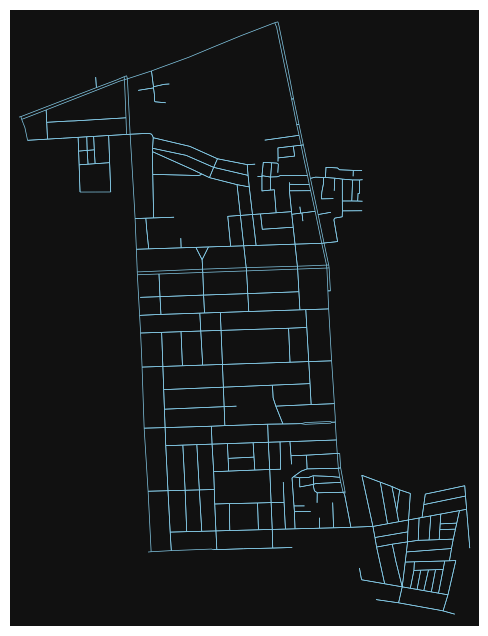

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt

# Define the area (You can change this to your neighborhood!)
place_name = "Indiranagar, Bengaluru, Karnataka, India"


graph = ox.graph_from_place(place_name, network_type='drive')

# Plot it to see what we are working with
ox.plot_graph(graph, node_size=0, edge_color='skyblue', edge_linewidth=0.5)
plt.show()

In [4]:
# Define typical speeds (in kph) for different Indian road types
hwy_speeds = {
    'residential': 20,
    'tertiary': 30,
    'secondary': 40,
    'primary': 50,
    'trunk': 60
}

graph = ox.add_edge_speeds(graph, hwy_speeds=hwy_speeds, fallback=25)

graph = ox.add_edge_travel_times(graph)

nodes, edges = ox.graph_to_gdfs(graph)
print(edges[['highway', 'length', 'speed_kph', 'travel_time']].head())

D:\Python\Lib\site-packages\osmnx\routing.py:577: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  edges[["highway", "speed_kph"]].set_index("highway").iloc[:, 0].fillna(hwy_speed_avg)


                               highway      length  speed_kph  travel_time
u         v           key                                                 
253179982 5469373780  0    residential  120.437037       20.0    21.678667
          1563306444  0      secondary  100.429522       40.0     9.038657
253179989 6136526267  0    residential    7.581071       20.0     1.364593
          1500742637  0    residential  101.552683       20.0    18.279483
          12107761085 0      secondary   48.106485       40.0     4.329584


In [5]:
import numpy as np

def apply_traffic_congestion(graph, congestion_factor=1.5):
    """
    Simulates traffic by multiplying travel time.
    1.5 means 50% more time than usual.
    """
    for u, v, k, data in graph.edges(data=True, keys=True):
        
        data['congested_time'] = data['travel_time'] * congestion_factor
    return graph

# Apply 2x traffic (Peak Hour)
graph = apply_traffic_congestion(graph, congestion_factor=2.0)

print("\nTraffic Applied! New 'congested_time' attribute created.")


Traffic Applied! New 'congested_time' attribute created.


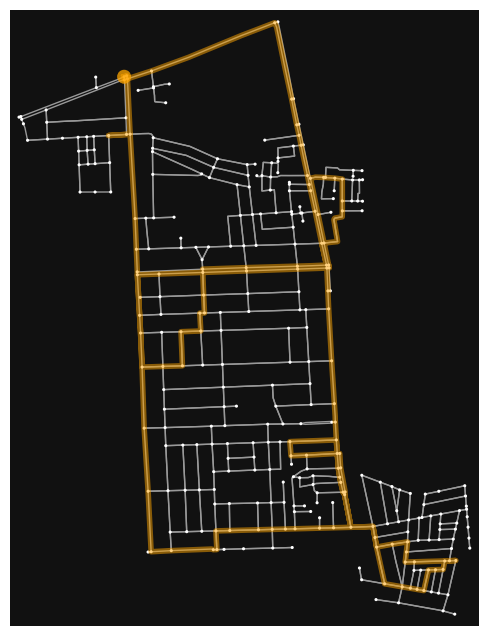

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [6]:
import random
import networkx as nx

nodes_list = list(graph.nodes())
delivery_points = random.sample(nodes_list, 10)
depot = delivery_points[0]

def get_distance_matrix(graph, points):
    matrix = {}
    for start in points:
        matrix[start] = {}
        for end in points:
            if start == end:
                matrix[start][end] = 0
            else:
                try:
                    matrix[start][end] = nx.shortest_path_length(graph, start, end, weight='congested_time')
                except nx.NetworkXNoPath:
                    matrix[start][end] = float('inf')
    return matrix

dist_matrix = get_distance_matrix(graph, delivery_points)

def solve_tsp_greedy(points, start_node, matrix):
    unvisited = set(points)
    unvisited.remove(start_node)
    route = [start_node]
    current = start_node
    
    while unvisited:
        next_node = min(unvisited, key=lambda node: matrix[current][node])
        unvisited.remove(next_node)
        route.append(next_node)
        current = next_node
        
    route.append(start_node)
    return route

optimal_order = solve_tsp_greedy(delivery_points, depot, dist_matrix)

full_route = []
for i in range(len(optimal_order) - 1):
    path = nx.shortest_path(graph, optimal_order[i], optimal_order[i+1], weight='congested_time')
    full_route.extend(path[:-1])
full_route.append(optimal_order[-1])

ox.plot_graph_route(graph, full_route, route_linewidth=4, node_size=5, route_color='orange')

In [8]:
!pip install folium streamlit-folium


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/524.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/524.6 kB ? eta -:--:--
   ------------------- -------------------- 262.1/524.6 kB ? eta -:--:--
   ------------------- -------------------- 262.1/524.6 kB ? eta -:--:--
   ------------------- -------------------- 262.1/524.6 kB ? eta -:--:--
   -------------------------------------- 524.6/524.6 kB 399.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.0 MB 644.1 kB/s eta 0:00:14
  

In [9]:
import folium


route_nodes = ox.graph_to_gdfs(graph, nodes=True, edges=False)
center_node = route_nodes.loc[full_route[0]]
m = folium.Map(location=[center_node['y'], center_node['x']], zoom_start=15, tiles="cartodbpositron")


route_coords = []
for node in full_route:
    point = graph.nodes[node]
    route_coords.append((point['y'], point['x']))

folium.PolyLine(route_coords, color="blue", weight=5, opacity=0.7).add_to(m)

for i, stop in enumerate(optimal_order):
    point = graph.nodes[stop]
    folium.Marker(
        location=[point['y'], point['x']],
        popup=f"Stop {i}: {'Warehouse' if i==0 else 'Customer'}",
        icon=folium.Icon(color="red" if i==0 else "blue", icon="info-sign")
    ).add_to(m)

# 5. Save and display
m.save("delivery_route.html")
m